# Programación aplicada a la Electrónica y a las Telecomunicaciones
## Examen Interciclo
### 10 de mayo de 2023

Para cada uno de los siguientes ejercicios, escriba un script de Python que realice la tarea indicada.

## Ejercicio 1 (4 puntos)

El script solicita al usuario ingresar dos enteros positivos en BINARIO. El script muestra la suma de los números ingresados por el usuario. El resultado de la suma deberá, obviamente, mostrarse en binario. Los binarios ingresados por el usuario pueden tener un número diferente de bits. NO ESTÁ PERMITIDO utilizar la función `int(numero, 2)`, la cual trata al valor almacenado en la variable `numero` como si fuera un número binario. Ejemplo:

El usuario ingresa:	101110 1101
El algoritmo muestra:	101110 + 1101 = 111011

In [29]:
def obtenerDecimal(binario_str):
    resultado = 0
    exponente = 0
    for i in binario_str[::-1]:
        if int(i) != 0:
            resultado += 2**exponente
        exponente += 1
    return resultado


def obtenerBinarioStr(num_decimal):
    bases = []
    base = 0
    exponente = 0
    while num_decimal > base:
        base = 2**exponente
        bases.append(base)
        exponente += 1
    binario_str = ''
    for i in bases[::-1]:
        if num_decimal >= i:
            binario_str += '1'
            num_decimal -= i
        else:
         binario_str += '0'
    return binario_str


num_binario = input('\ningrese un numero binario: ')
num_binario_2 = input('\ningrese el segundo numero binario: ')

num1 = obtenerDecimal(num_binario)
num2 = obtenerDecimal(num_binario_2)

print(f'{num_binario} + {num_binario_2} = {obtenerBinarioStr(num1 + num2)}')      

101110 + 1101 = 0111011


## Ejercicio 2 (4 puntos)

En la teoría de números, un número narcisista es un número igual a la suma de sus propios dígitos, cada uno de los cuales está elevado a la potencia de la cantidad de dígitos. Ejemplos:

* El número 153 es narcisista ya que 13 + 53 + 33 = 1 + 125 + 27 = 153
* El número 9474 es narcisista ya que 94 + 44 + 74 + 44 = 9474

El script solicita al usuario ingresar un entero positivo. El script muestra si el valor ingresado corresponde a un número narcisista o no. Por ejemplo:

* Si el usuario ingresa 153, el algoritmo deberá mostrar:

> 153 SÍ es un número narcisista (1^3 + 5^3 + 3^3 es igual a 153)

* Si el usuario ingresa 54748, el algoritmo deberá mostrar:

> 54748 SÍ es un número narcisista (5^5 + 4^5 + 7^5 + 4^5 + 8^5 es igual a 54748)

* Si el usuario ingresa 125, el algoritmo deberá mostrar:

> 125 NO es un número narcisista (1^3 + 2^3 + 5^3 NO es igual a 125)

El resultado mostrado por el script deberá seguir EXACTAMENTE el formato indicado en los ejemplos.

In [12]:
def detectarNumeroNarcicista(numero):
    is_narcisista = False
    numero_str = f'{numero}'
    exponente = len(numero_str)
    expresion = ''
    total = 0
    for i in numero_str:
        total += int(i)**exponente
        expresion += f'{i}^{exponente} + '
    if total == numero:
        is_narcisista = True
    return is_narcisista, expresion[:-2]

def verificarNumero(numero):
    is_narcisista, expresion = detectarNumeroNarcicista(numero)
    res = 'NO' if not is_narcisista else 'SI'
    print(f'{numero} {res} es un numero narcisista ({expresion} {res} es igual a {numero})')
    
numero = int(input('\nIngrese un numero entero: '))
verificarNumero(numero)

54748 SI es un numero narcisista (5^5 + 4^5 + 7^5 + 4^5 + 8^5  SI es igual a 54748)


## Ejercicio 3 (4 puntos)

Asuma que está dada una lista de números enteros. El script solicita al usuario que ingrese un número entero. El script debe mostrar todas las combinaciones ÚNICAS de dos números de la lista que sumados dan como resultado el número ingresado por el usuario. Las combinaciones deberán mostrarse como una lista de tuplas. Por ejemplo, suponga que se tiene la lista:

`[11, 15, 2, 13, 4, 19, 9, 3, 7, 18, 1, 5, 11, 20, 12]`

Suponga, además, que el usuario ingresa el número 20. El script deberá mostrar:

`[(11, 9), (15, 5), (2, 18), (13, 7), (19, 1)]`

El algoritmo deberá funcionar para cualquier lista de números enteros y para cualquier número entero ingresado por el usuario.

In [4]:
def generarListaCombinaciones(numeros, numero):
    combinaciones = []
    for i in numeros:
        for y in numeros:
            if i + y == numero and (i, y) not in combinaciones and (y, i) not in combinaciones:
                combinaciones.append((i, y))
    return combinaciones
            

lista = [11, 15, 2, 13, 4, 19, 9, 3, 7, 18, 1, 5, 11, 20, 12]
numero = int(input('\nIngrese un numero entero: '))

print(f'res = {generarListaCombinaciones(lista, numero)}')  

res = [(11, 9), (15, 5), (2, 18), (13, 7), (19, 1)]


## Ejercicio 4 (8 puntos)

Suponga que se tiene un diccionario que contenga como claves los nombres de varios estudiantes, y como valor las calificaciones desagregadas obtenidas por esos estudiantes para una materia específica. Las calificaciones corresponden a los siguientes COMPONENTES: Aprovechamiento 1 (sobre 25), Examen Interciclo (sobre 20), Aprovechamiento 2 (sobre 25), Examen Final (sobre 30), Examen Supletorio (sobre 30), y Calificación General (la suma sobre 100 de las calificaciones parciales). Es decir, para cada estudiante vamos a tener 6 calificaciones (una por cada componente), por ejemplo:

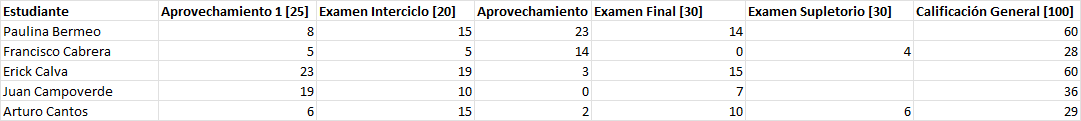
Escriba una función en Python separada para cada una de las siguientes tareas:

1. Agregar las calificaciones de un nuevo estudiante al diccionario. La función deberá recibir como parámetros el nombre y las calificaciones del estudiante en los 5 componentes. El sexto componente (Calificación General) se deberá calcular automáticamente como la suma de los otros componentes. En caso de que la calificación del supletorio esté disponible, recuerde que la nota del supletorio reemplaza al examen final en el cálculo de la calificación general **(1 punto)**
2. Modificar una calificación individual de un estudiante específico. La función deberá recibir como parámetros el nombre del estudiante, el componente que quiere modificar, y la nueva calificación. **(1 punto)**
3. Eliminar un estudiante. La función deberá recibir como parámetro el nombre del estudiante que se desea eliminar. **(1 punto)**
4. Mostrar las calificaciones de todos los componentes de un estudiante específico. La función deberá recibir como parámetro el nombre del estudiante. **(1 punto)**
5. Mostrar el nombre y la nota de los estudiantes con la calificación mayor y menor en un componente específico. La función deberá recibir como parámetro el nombre del componente para el cual se desea determinar el máximo y el mínimo. **(1 punto)**
6. Mostrar el promedio de las calificaciones de todos los estudiantes en un componente específico. La función deberá recibir como parámetro el nombre del componente para el cual se desea visualizar el promedio. **(1 punto)**

El script deberá mostrar un menú que permita al usuario escoger la tarea que desea realizar de la siguiente manera **(1 punto)**:

1. Agregar estudiante
2. Modificar calificación
3. Eliminar estudiante
4. Mostrar todas las calificaciones de un estudiante
5. Mostrar estudiantes con calificaciones mayores y menores
6. Mostrar calificación promedio

Escoja una opción [1-6]:

Para cada tarea se deberá solicitar al usuario la información requerida y mostrar los resultados correspondientes.

Para este ejercicio, Ud. deberá decidir cómo estructura los datos dentro del diccionario. De igual manera, deberá proveer un ejemplo del diccionario llenado con los datos de 5 estudiantes como mínimo para poder probar el funcionamiento de su script. **(1 punto)**

In [25]:
isEnListaEstudiantes = lambda nombre_estudiante, estudiantes: nombre_estudiante in estudiantes.keys()

def agregarCalificacion(nombre_estudiante, estudiantes):
    nota_1 = int(input('\nIngrese la nota del aprovechamiento 1: '))
    examen_1 = int(input('\nIngrese la nota del examen interciclo: '))
    nota_2 = int(input('\nIngrese la nota del aprovechamiento 2: '))
    examen_2 = int(input('\nIngrese la nota del examen final: '))
    supletorio = input('\nEl estudiante rindio un examen supletorio (s/n)?: ')
    notas = [nota_1, examen_1, nota_2, examen_2]
    if supletorio == 's':
        ex_sup = int(input('\nIngrese la nota del examen supletorio: '))
        notas.append(ex_sup)
    else:
        notas.append(-1)
    posc_examen_no_valido = 4
    if notas[4] != -1:
        posc_examen_no_valido = 3
    total = 0
    for psc, valor in enumerate(notas):
        if psc != posc_examen_no_valido:
            total += valor
    notas.append(total)    
    estudiantes[nombre_estudiante] = notas
    return estudiantes


def modificarNotas(nombre_estudiante, posc_nota, nueva_nota, estudiantes):
    num_notas = len(estudiantes[nombre_estudiante])
    for psc in range(num_notas):
        if psc == posc_nota:
            estudiantes[nombre_estudiante][psc] = nueva_nota
    return estudiantes
    

def eliminarEstudiante(nombre_estudiante, estudiantes):
    estudiantes.pop(nombre_estudiante)
    return estudiantes


def mostrarCalificacionesEstudiante(nombre_estudiante, estudiantes):
    titulos = ['Aprovechamiento 1[25]','Examen Interciclo[20]','Aprovechamiento 2[25]','Examen Final[30]','Examen Supletorio 1[30]','Calificacion General[100]']
    notas = []
    for i in estudiantes[nombre_estudiante]:
        if i == -1:
            notas.append('')
        else:
            notas.append(f'{i}')
    tabla = [titulos, notas]
    for fila in tabla:
        print('\t'.join(str(columna) for columna in fila))
    return estudiantes       


def obtenerEstudiantesConMayorMenorCalificacion(psc_nota, estudiantes):
    nombres = estudiantes.keys()
    notas = [i[psc_nota] for i in estudiantes]
    notas_nombres = {}
    for psc, val in enumerate(notas):
        notas_nombres[val] = estudiantes[psc]
    notas_ordenadas = sorted(notas)
    nota_min = notas[1]
    est_nota_min = notas_nombres[nota_min]
    nota_max = notas[-1]
    est_nota_max = notas_nombres[nota_max]
    return [nota_min, nota_max, est_nota_min, est_nota_max]
    

print(f'res = {agregarCalificacion("Maria", {})}')


#estudiante = input('\nIngrese el nombre del estudiante: ')
    
    

ValueError: invalid literal for int() with base 10: ''